## House Price Prediction-Python codes

## Task -1

In [ ]:
# Import necessary and essential libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Display all the columns of DataFrame
df=pd.read_excel('/content/HousePrediction.xlsx')
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [ ]:
# Read the data and display the first 100 rows
df.head(100)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,60,RL,9765,Corner,1Fam,8,1993,1993,VinylSd,0.0,680.0,185000.0
96,96,20,RL,10264,Inside,1Fam,5,1999,1999,VinylSd,0.0,1588.0,214000.0
97,97,20,RL,10921,Inside,1Fam,5,1965,1965,HdBoard,0.0,960.0,94750.0
98,98,30,RL,10625,Corner,1Fam,5,1920,1950,Wd Sdng,0.0,458.0,83000.0


In [ ]:
# Give column insights
# --- 1. General Overview ---
print("--- General Dataset Information ---")
df.info()

# --- 2. Numerical Column Insights ---
print("\n--- Numerical Column Statistics ---")
df.describe()

# --- 3. Categorical & Temporal Analysis ---
print("\n--- Categorical & Temporal Value Counts ---")
# Get list of categorical and temporal columns (including encoded ones like MSSubClass)
# Note: MSSubClass is numeric but represents categories, so we treat it as such for insights.
categorical_cols = ['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st', 'MSSubClass']
temporal_cols = ['YearBuilt', 'YearRemodAdd']

for col in categorical_cols + temporal_cols:
    if col in df.columns:
        print(f"\nColumn: {col}")
        print(f"Unique Values: {df[col].nunique()}")
        print(f"Top 5 Most Frequent Values:\n{df[col].value_counts().head(5)}")

# --- 4. Target Variable Analysis ---
print("\n--- Target Variable (SalePrice) ---")
print(f"Missing Values (Test Set size): {df['SalePrice'].isnull().sum()}")
print(f"Known Values (Training Set size): {df['SalePrice'].notnull().sum()}")
print(df['SalePrice'].describe())

--- General Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB

--- Numerical Column Statistics ---

--- Categorical & Temporal Value Counts ---

Column: MSZoning
Unique Values: 5
Top 5 Most Frequent Values:
MSZ

### Task-2

In [ ]:
# Check for missing values in each column
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,4
LotArea,0
LotConfig,0
BldgType,0
OverallCond,0
YearBuilt,0
YearRemodAdd,0
Exterior1st,1


In [ ]:
#  Features with NAN Values
# Calculate the number of missing values per column
null_counts = df.isnull().sum()

# Calculate the percentage of missing values per column
null_percent = (df.isnull().sum() / len(df)) * 100

# Create a summary DataFrame
missing_data = pd.DataFrame({
    'Missing Values': null_counts,
    'Percentage': null_percent
})

# Filter to show only columns with missing values and sort them
missing_features = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Missing Values', ascending=False)

print("--- Features with NaN Values ---")
print(missing_features)

--- Features with NaN Values ---
             Missing Values  Percentage
SalePrice              1459   49.982871
MSZoning                  4    0.137033
Exterior1st               1    0.034258
BsmtFinSF2                1    0.034258
TotalBsmtSF               1    0.034258


In [ ]:
# Calculate Mean Sales Price for Missing/Present Information

# 1. Identify features with missing data (excluding SalePrice)
features_with_missing = [col for col in df.columns
                         if df[col].isnull().sum() > 0 and col != 'SalePrice']

print(f"Features with missing data: {features_with_missing}\n")

# 2. Calculate Mean Sale Price for Missing vs. Present
results = []
for feature in features_with_missing:
    # Calculate mean price where the feature is missing
    mean_missing = df[df[feature].isnull()]['SalePrice'].mean()

    # Calculate mean price where the feature is present
    mean_present = df[df[feature].notnull()]['SalePrice'].mean()

    results.append({
        'Feature': feature,
        'Mean Price (Missing)': mean_missing,
        'Mean Price (Present)': mean_present
    })

# 3. Display the results
results_df = pd.DataFrame(results)
print("--- Mean Sale Price: Missing vs. Present Information ---")
print(results_df)

Features with missing data: ['MSZoning', 'Exterior1st', 'BsmtFinSF2', 'TotalBsmtSF']

--- Mean Sale Price: Missing vs. Present Information ---
       Feature  Mean Price (Missing)  Mean Price (Present)
0     MSZoning                   NaN          180921.19589
1  Exterior1st                   NaN          180921.19589
2   BsmtFinSF2                   NaN          180921.19589
3  TotalBsmtSF                   NaN          180921.19589


In [ ]:
#  Count of Numerical Features
# 1. Select numerical columns
# 'number' includes both integers (int64) and floats (float64)
numerical_features = df.select_dtypes(include=['number'])

# 2. Get the count and list of features
count = len(numerical_features.columns)
feature_names = numerical_features.columns.tolist()

# 3. Display the results
print(f"Total Count of Numerical Features: {count}")
print("\nList of Numerical Features:")
print(feature_names)

Total Count of Numerical Features: 9

List of Numerical Features:
['Id', 'MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice']


In [ ]:
# Print the First Five Rows of Numerical Values
# Select only numerical columns (integers and floats)
numerical_df = df.select_dtypes(include=['number'])

# Display the first 5 rows
print("--- First 5 Rows of Numerical Features ---")
print(numerical_df.head())

--- First 5 Rows of Numerical Features ---
   Id  MSSubClass  LotArea  OverallCond  YearBuilt  YearRemodAdd  BsmtFinSF2  \
0   0          60     8450            5       2003          2003         0.0   
1   1          20     9600            8       1976          1976         0.0   
2   2          60    11250            5       2001          2002         0.0   
3   3          70     9550            5       1915          1970         0.0   
4   4          60    14260            5       2000          2000         0.0   

   TotalBsmtSF  SalePrice  
0        856.0   208500.0  
1       1262.0   181500.0  
2        920.0   223500.0  
3        756.0   140000.0  
4       1145.0   250000.0  


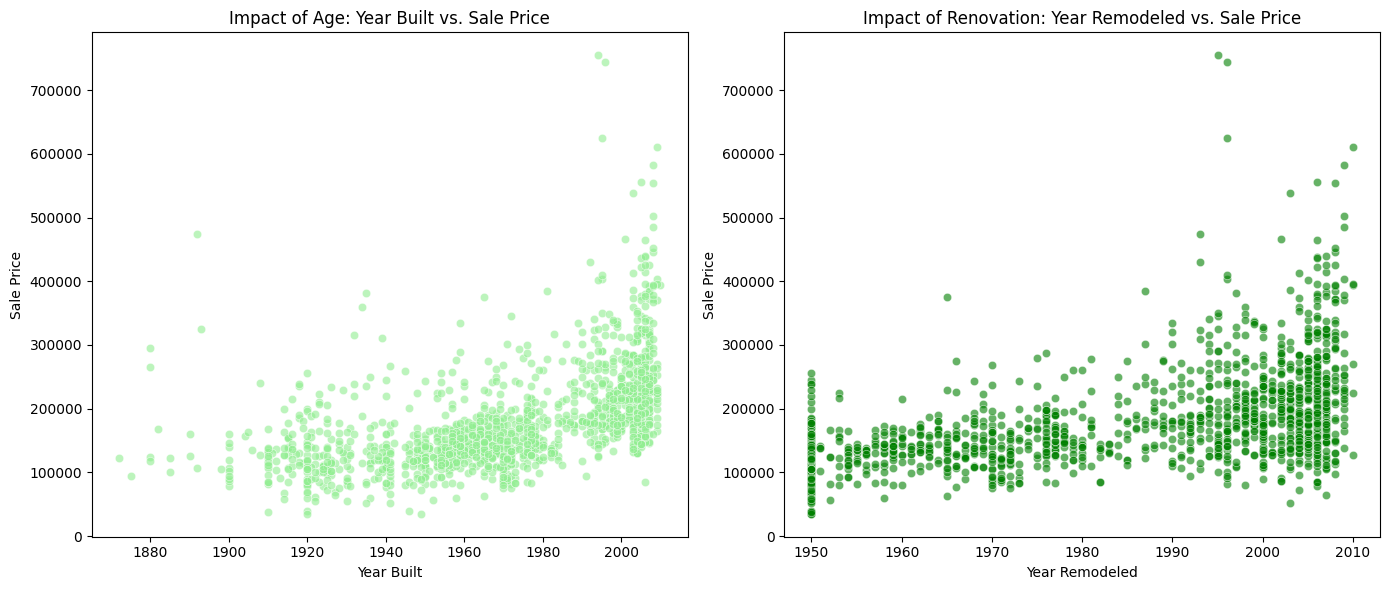

--- Correlation Analysis ---
Correlation (YearBuilt vs. SalePrice):    0.5229
Correlation (YearRemodAdd vs. SalePrice): 0.5071


In [ ]:
#  Compare the Difference Between Year Features and SalePrice
# --- Visualization: Scatter Plots ---
plt.figure(figsize=(14, 6))

# YearBuilt vs. SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, alpha=0.6, color = 'LightGreen')
plt.title('Impact of Age: Year Built vs. Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

# YearRemodAdd vs. SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, alpha=0.6, color = 'Green')
plt.title('Impact of Renovation: Year Remodeled vs. Sale Price')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

# --- Statistical Analysis: Correlation ---
corr_built = df['YearBuilt'].corr(df['SalePrice'])
corr_remod = df['YearRemodAdd'].corr(df['SalePrice'])

print("--- Correlation Analysis ---")
print(f"Correlation (YearBuilt vs. SalePrice):    {corr_built:.4f}")
print(f"Correlation (YearRemodAdd vs. SalePrice): {corr_remod:.4f}")

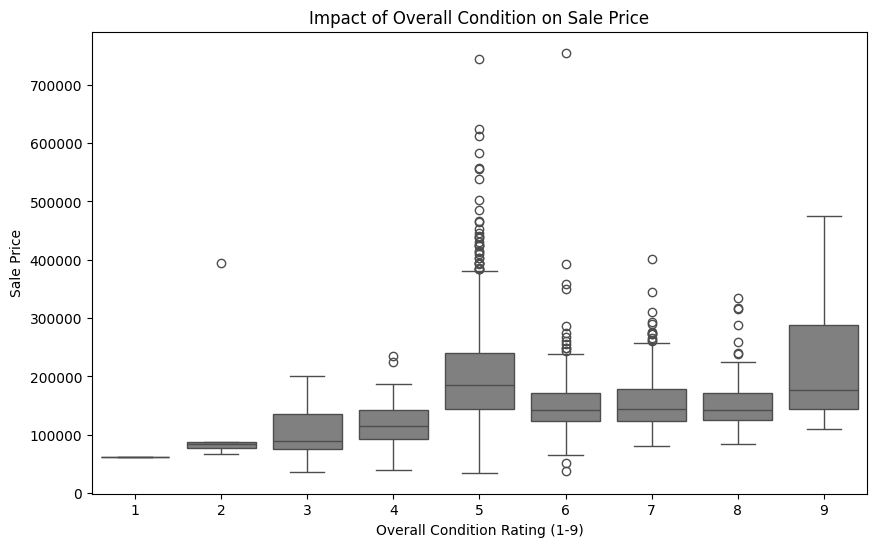

--- Statistical Findings ---
Correlation (OverallCond vs. SalePrice): -0.0779

--- Average Sale Price by Overall Condition ---
OverallCond
1     61000.000000
2    141986.400000
3    101929.400000
4    120438.438596
5    203146.914738
6    153961.591270
7    158145.487805
8    155651.736111
9    216004.545455
Name: SalePrice, dtype: float64


In [ ]:
# Relationship Between Discrete Variables and Sales Price
# ---  Visualization: Box Plot ---
# Box plots are excellent for discrete variables because they show the
# distribution of prices for each category (e.g., how prices vary for Condition=5 vs Condition=9).
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df, color="Grey")
plt.title('Impact of Overall Condition on Sale Price')
plt.xlabel('Overall Condition Rating (1-9)')
plt.ylabel('Sale Price')
plt.show()

# ---  Statistical Analysis ---
# A. Correlation Coefficient
correlation = df['OverallCond'].corr(df['SalePrice'])
print("--- Statistical Findings ---")
print(f"Correlation (OverallCond vs. SalePrice): {correlation:.4f}")

# B. Average Price by Condition
# This helps explain the correlation. Sometimes 'average' condition homes (5) are newer
# and priced higher than 'good' condition older homes (7), which can skew simple correlation.
print("\n--- Average Sale Price by Overall Condition ---")
print(df.groupby('OverallCond')['SalePrice'].mean().sort_index())

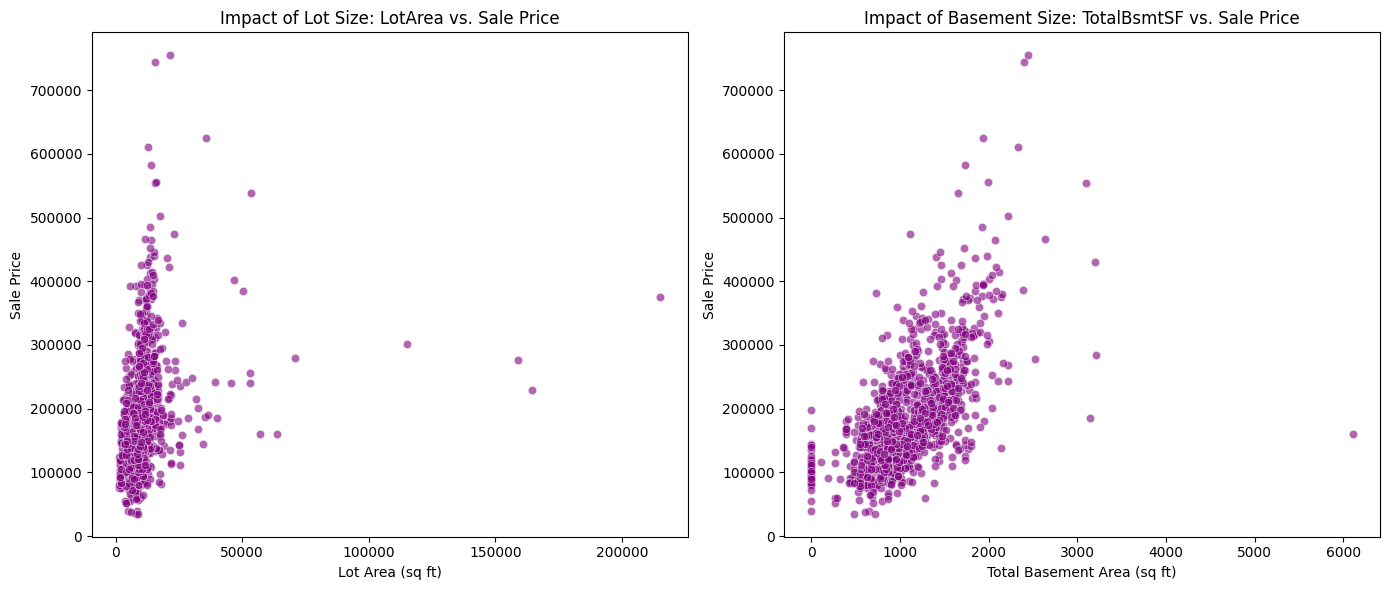

--- Correlation Analysis ---
Correlation (LotArea vs. SalePrice):     0.2638
Correlation (TotalBsmtSF vs. SalePrice): 0.6136


In [ ]:
#  Relationship Between Continuous Variables and Sales Price
# --- Visualization: Scatter Plots ---
plt.figure(figsize=(14, 6))

# LotArea vs. SalePrice
plt.subplot(1, 2, 1)
sns.scatterplot(x='LotArea', y='SalePrice', data=df, alpha=0.6, color='Purple')
plt.title('Impact of Lot Size: LotArea vs. Sale Price')
plt.xlabel('Lot Area (sq ft)')
plt.ylabel('Sale Price')

# TotalBsmtSF vs. SalePrice
plt.subplot(1, 2, 2)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df, alpha=0.6, color='Purple')
plt.title('Impact of Basement Size: TotalBsmtSF vs. Sale Price')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price')

plt.tight_layout()
plt.show()

# --- Statistical Analysis: Correlation ---
corr_lot = df['LotArea'].corr(df['SalePrice'])
corr_bsmt = df['TotalBsmtSF'].corr(df['SalePrice'])

print("--- Correlation Analysis ---")
print(f"Correlation (LotArea vs. SalePrice):     {corr_lot:.4f}")
print(f"Correlation (TotalBsmtSF vs. SalePrice): {corr_bsmt:.4f}")

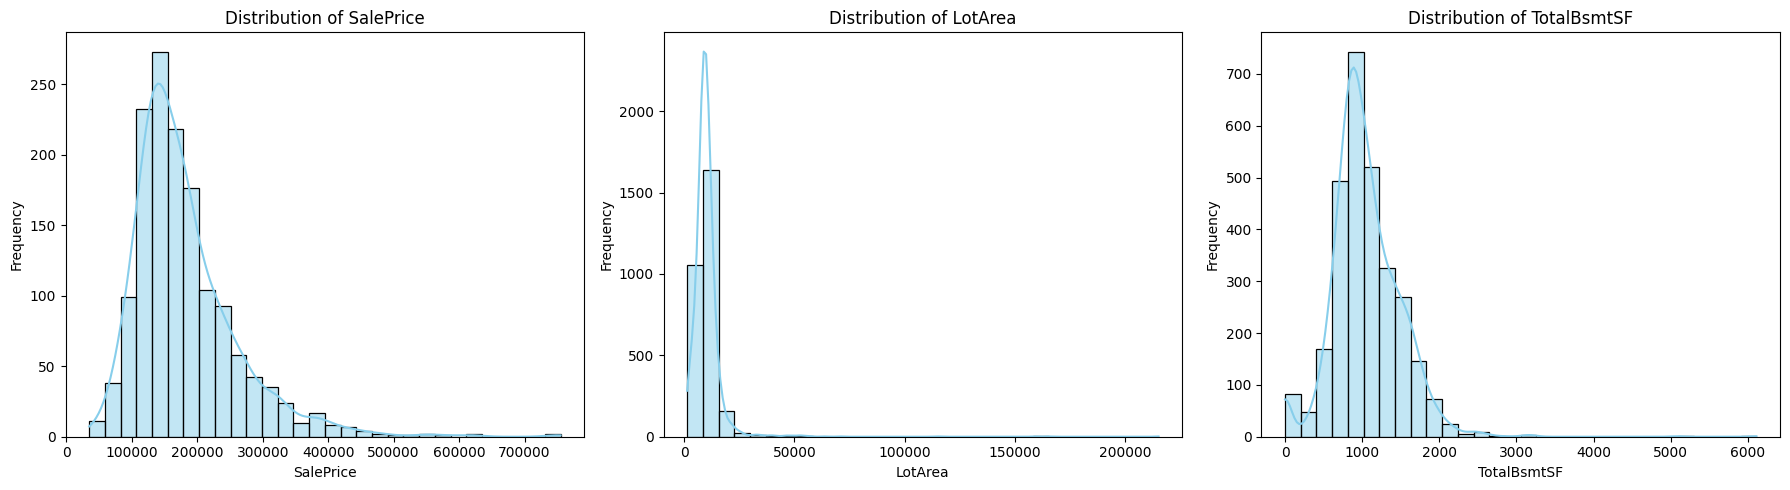

--- Skewness Analysis ---
SalePrice       1.882876
LotArea        12.829025
TotalBsmtSF     1.162882
dtype: float64


In [ ]:
#  Histogram Analysis for Continuous Variables
# Select key continuous variables
continuous_vars = ['SalePrice', 'LotArea', 'TotalBsmtSF']

# --- Visualization: Histograms ---
plt.figure(figsize=(18, 5))

for i, var in enumerate(continuous_vars):
    plt.subplot(1, 3, i+1)
    # Plot histogram with KDE (Kernel Density Estimate) to show the curve
    sns.histplot(df[var].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# --- Statistical Analysis: Skewness ---
# Skewness measures the asymmetry of the distribution.
# Value > 1 implies highly positively skewed (tail on the right).
skewness_vals = df[continuous_vars].skew()

print("--- Skewness Analysis ---")
print(skewness_vals)

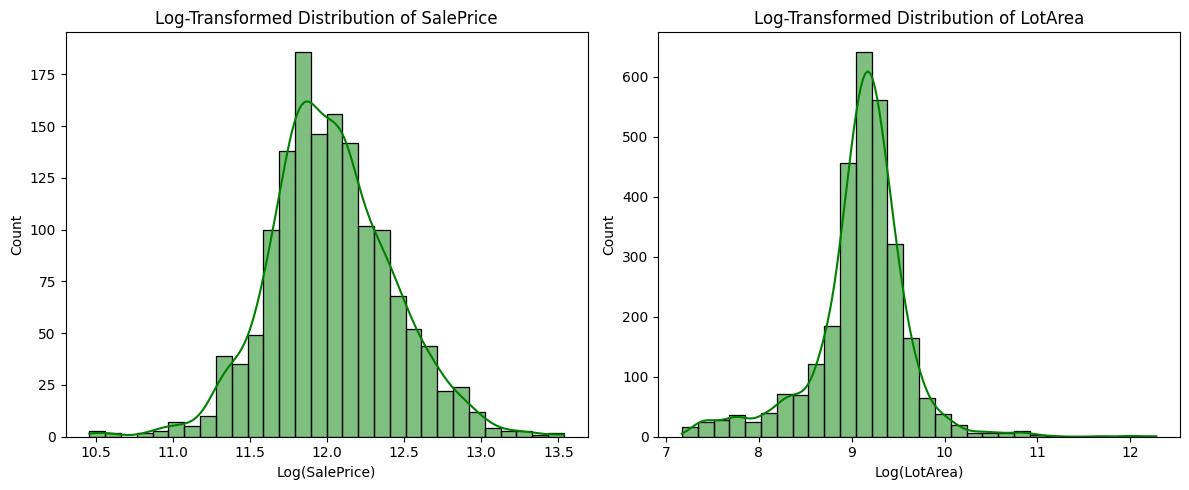

--- Skewness Comparison ---
Original Skewness (approx): SalePrice=1.88, LotArea=12.83
New Skewness:
SalePrice    0.121347
LotArea     -0.505010
dtype: float64


In [ ]:
#  Logarithmic Transformation
# Variables identified as skewed in previous steps
skewed_cols = ['SalePrice', 'LotArea']

# --- Apply Log Transformation ---
# We use np.log1p() which calculates log(1 + x)
# This is standard for price and area data to handle zeros and reduce skew.
df_log = df.copy()
for col in skewed_cols:
    df_log[col] = np.log1p(df[col])

# --- Visualization: Transformed Distributions ---
plt.figure(figsize=(12, 5))

for i, var in enumerate(skewed_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_log[var].dropna(), kde=True, bins=30, color='green')
    plt.title(f'Log-Transformed Distribution of {var}')
    plt.xlabel(f'Log({var})')

plt.tight_layout()
plt.show()

# --- Statistical Verification ---
print("--- Skewness Comparison ---")
print("Original Skewness (approx): SalePrice=1.88, LotArea=12.83")
print("New Skewness:")
print(df_log[skewed_cols].skew())

## Task-3

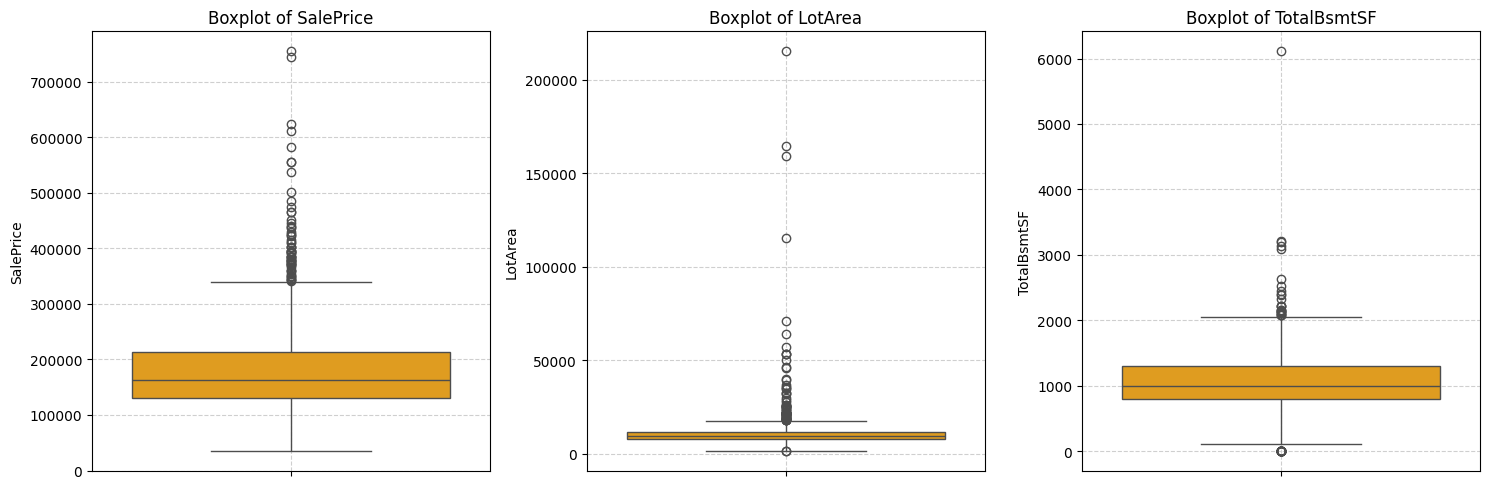

--- Outlier Detection Statistics (IQR Method) ---
Feature: SalePrice
  - IQR: 84025.0
  - Acceptable Range: [3937.50, 340037.50]
  - Number of Outliers Detected: 61
------------------------------
Feature: LotArea
  - IQR: 4048.0
  - Acceptable Range: [1481.50, 17673.50]
  - Number of Outliers Detected: 69
------------------------------
Feature: TotalBsmtSF
  - IQR: 502.5
  - Acceptable Range: [42.00, 2052.00]
  - Number of Outliers Detected: 61
------------------------------


In [ ]:
# Find Outliers
# Select features to check for outliers
features_to_check = ['SalePrice', 'LotArea', 'TotalBsmtSF']

# Drop rows where these specific columns might be NaN (mainly for the plot's sake)
df_clean = df.dropna(subset=features_to_check)

# --- Visualization: Boxplots ---
plt.figure(figsize=(15, 5))
for i, col in enumerate(features_to_check):
    plt.subplot(1, 3, i+1)
    # Boxplots are the standard visual tool for finding outliers
    sns.boxplot(y=df_clean[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# --- Statistical Method: IQR (Interquartile Range) ---
print("--- Outlier Detection Statistics (IQR Method) ---")

for col in features_to_check:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]

    print(f"Feature: {col}")
    print(f"  - IQR: {IQR}")
    print(f"  - Acceptable Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  - Number of Outliers Detected: {len(outliers)}")
    print("-" * 30)

/tmp/ipython-input-3027879385.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice', data=df, order=sorted_order, palette='Set2')
/tmp/ipython-input-3027879385.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice', data=df, order=sorted_order, palette='Set2')
/tmp/ipython-input-3027879385.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice', data=df, order=sorted_order, palette='Set2')


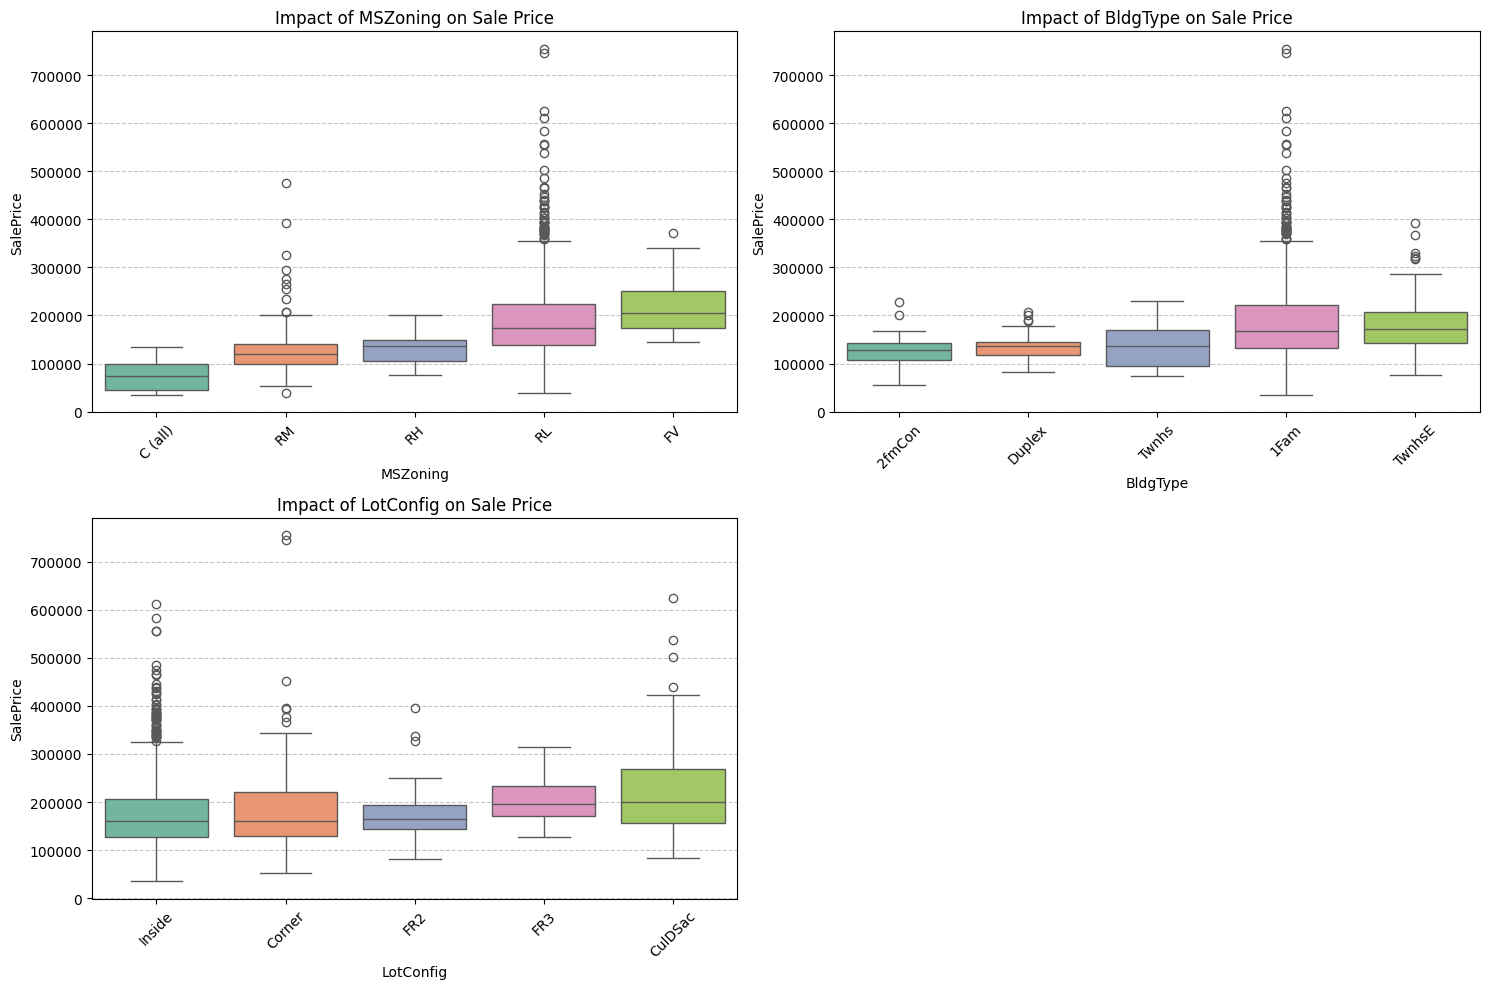

--- Price Analysis by Category ---

Feature: MSZoning
               mean    median  count
MSZoning                            
FV        214014.06  205950.0     65
RL        191004.99  174000.0   1151
RH        131558.38  136500.0     16
RM        126316.83  120500.0    218
C (all)    74528.00   74700.0     10
----------------------------------------

Feature: BldgType
               mean    median  count
BldgType                            
1Fam      185763.81  167900.0   1220
TwnhsE    181959.34  172200.0    114
Twnhs     135911.63  137500.0     43
Duplex    133541.08  135980.0     52
2fmCon    128432.26  127500.0     31
----------------------------------------

Feature: LotConfig
                mean    median  count
LotConfig                            
CulDSac    223854.62  199262.0     94
FR3        208475.00  195450.0      4
Corner     181623.43  160000.0    263
FR2        177934.57  165000.0     47
Inside     176938.05  159697.5   1052
----------------------------------------


In [ ]:
# Relationship Between Categorical Features and SalePrice
# List of categorical features to analyze
categorical_features = ['MSZoning', 'BldgType', 'LotConfig']

# --- Visualization: Boxplots ---
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)

    # Sort categories by Median Price to make the plot readable
    # This helps visualize the progression from "cheapest" to "most expensive" types
    sorted_order = df.groupby(feature)['SalePrice'].median().sort_values().index

    sns.boxplot(x=feature, y='SalePrice', data=df, order=sorted_order, palette='Set2')
    plt.title(f'Impact of {feature} on Sale Price')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Statistical Analysis: GroupBy ---
print("--- Price Analysis by Category ---")

for feature in categorical_features:
    print(f"\nFeature: {feature}")
    # Calculate Mean, Median, and Count for each category
    # 'mean' shows the average price
    # 'count' shows how common that category is
    stats = df.groupby(feature)['SalePrice'].agg(['mean', 'median', 'count']).sort_values(by='mean', ascending=False)
    print(stats.round(2))
    print("-" * 40)

--- Correlation with Sale Price (Sorted) ---
SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
Id             -0.021917
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64


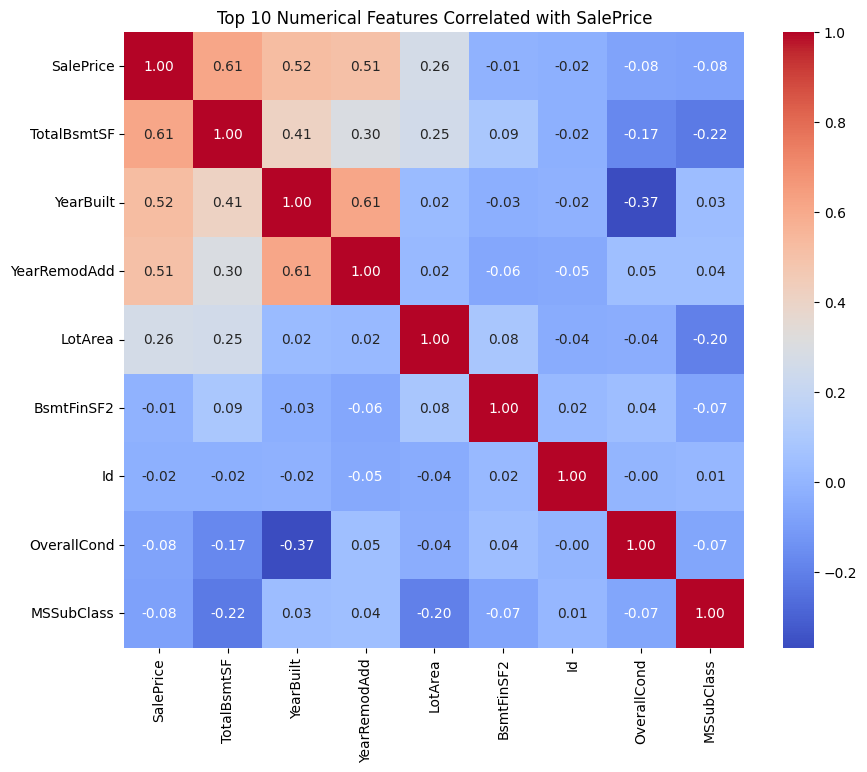

In [ ]:
# Correlation Between Numerical Features and SalePrice

# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Filter for correlation with 'SalePrice' and sort
# We sort in descending order to see the strongest positive correlations first
sale_price_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("--- Correlation with Sale Price (Sorted) ---")
print(sale_price_corr)

# Visualization: Heatmap of Top Correlated Features
# We pick the top 10 features to keep the plot readable
top_features = sale_price_corr.head(11).index # 10 features + SalePrice itself
top_corr_matrix = numerical_df[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Numerical Features Correlated with SalePrice')
plt.show()

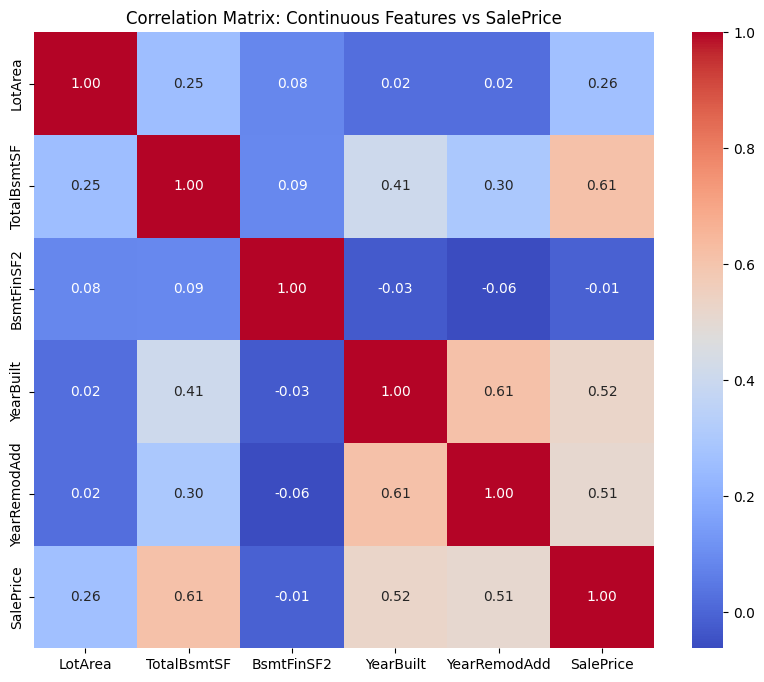

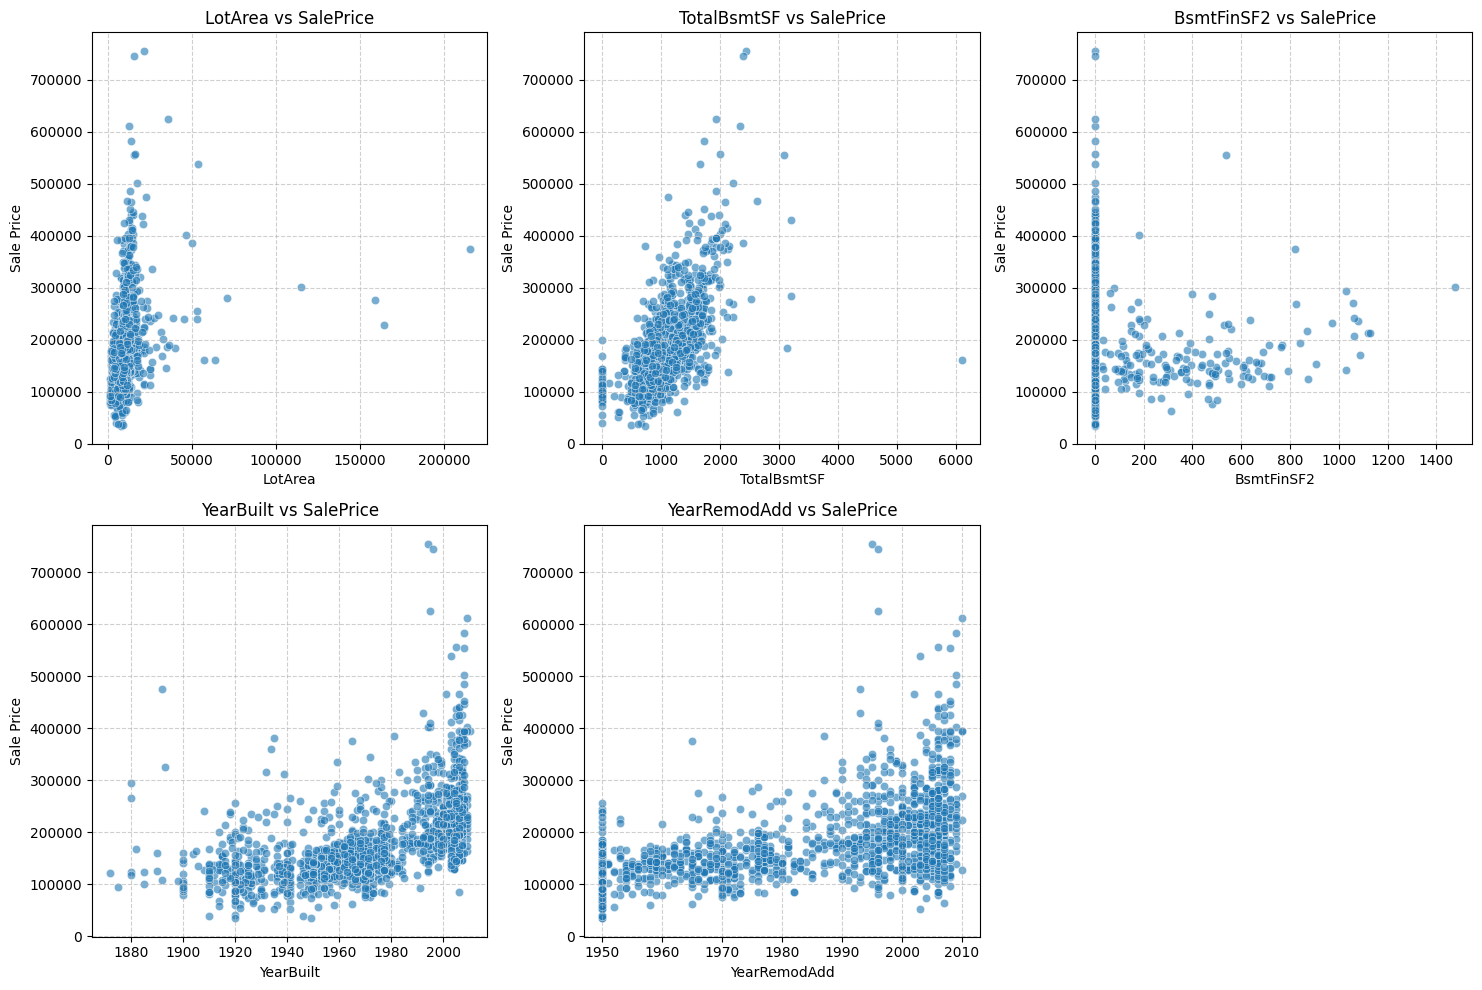

--- Correlation with SalePrice ---
SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
BsmtFinSF2     -0.011378
Name: SalePrice, dtype: float64


In [ ]:
# Continuous Features vs. SalePrice
# Identify Continuous Variables
# We select numerical features that are continuous or interval in nature
continuous_features = ['LotArea', 'TotalBsmtSF', 'BsmtFinSF2', 'YearBuilt', 'YearRemodAdd']

# Correlation Matrix
# Calculate the correlation between these features and SalePrice
correlation_data = df[continuous_features + ['SalePrice']].corr()

# Visualize with a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Continuous Features vs SalePrice')
plt.show()

# Scatter Plots
# Create scatter plots to visualize the direct relationship
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=feature, y='SalePrice', data=df, alpha=0.6)
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print Correlation Values
print("--- Correlation with SalePrice ---")
print(correlation_data['SalePrice'].sort_values(ascending=False))

In [ ]:
# Feature Engineering

import numpy as np
from sklearn.preprocessing import StandardScaler

# Separate Target Variable for safety
# (We will process features 'X' separately from target 'y')
features = df.drop(columns=['SalePrice', 'Id']) # Drop Id as it's not useful
target = df['SalePrice']

print(f"Original Features Shape: {features.shape}")

# --- STEP 1: Handle Missing Values ---
# Define columns by type
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = features.select_dtypes(include=['object']).columns

# A. Impute Numerical with Median
for col in numeric_cols:
    features[col] = features[col].fillna(features[col].median())

# B. Impute Categorical with Mode
for col in categorical_cols:
    features[col] = features[col].fillna(features[col].mode()[0])

print("1. Missing values imputed (Median for Numerical, Mode for Categorical).")


# --- STEP 2: Handle Temporal Variables ---
# Create Age features and remove original Year columns
# We use 2011 as the reference year
features['HouseAge'] = 2011 - features['YearBuilt']
features['YearsSinceRemodel'] = 2011 - features['YearRemodAdd']

# Drop original year columns
features.drop(['YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)
print("2. Temporal features 'HouseAge' and 'YearsSinceRemodel' created.")


# --- STEP 3: Handle Numerical Variables ---
# A. Log Transformation for Skewed Features (e.g., LotArea)
features['LotArea'] = np.log1p(features['LotArea'])

# B. Scaling (StandardScaler)
# This ensures all numerical features have Mean=0 and Variance=1
# (Important for models like Regression and Neural Networks)
scaler = StandardScaler()

# Re-select numeric columns (since we added/removed some in Step 2)
current_numeric_cols = features.select_dtypes(include=['number']).columns
features[current_numeric_cols] = scaler.fit_transform(features[current_numeric_cols])

print("3. Numerical variables Log-transformed (LotArea) and Scaled (StandardScaler).")


# --- STEP 4: Handle Categorical Variables ---
# One-Hot Encoding (converts text categories into binary columns 0/1)
# drop_first=True helps prevent multicollinearity (Dummy Variable Trap)
features_final = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

print("4. Categorical variables One-Hot Encoded.")


# --- Final Output ---
print("\n--- Feature Engineering Complete ---")
print(f"Final Data Shape: {features_final.shape}")
print("\nFirst 5 Rows of Processed Data:")
print(features_final.head())

Original Features Shape: (2919, 11)
1. Missing values imputed (Median for Numerical, Mode for Categorical).
2. Temporal features 'HouseAge' and 'YearsSinceRemodel' created.
3. Numerical variables Log-transformed (LotArea) and Scaled (StandardScaler).
4. Categorical variables One-Hot Encoded.

--- Feature Engineering Complete ---
Final Data Shape: (2919, 33)

First 5 Rows of Processed Data:
   MSSubClass   LotArea  OverallCond  BsmtFinSF2  TotalBsmtSF  HouseAge  \
0    0.067331 -0.103719    -0.507284   -0.293025    -0.444278 -1.046258   
1   -0.873616  0.146544     2.188279   -0.293025     0.477158 -0.154764   
2    0.067331  0.457629    -0.507284   -0.293025    -0.299027 -0.980221   
3    0.302568  0.136301    -0.507284   -0.293025    -0.671232  1.859351   
4    0.067331  0.922662    -0.507284   -0.293025     0.211621 -0.947203   

   YearsSinceRemodel  MSZoning_FV  MSZoning_RH  MSZoning_RL  ...  \
0          -0.896833        False        False         True  ...   
1           0.395604

Advanced Visualization & Analysis

/tmp/ipython-input-2873295143.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice', data=df, order=order, palette='viridis')
/tmp/ipython-input-2873295143.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice', data=df, order=order, palette='viridis')


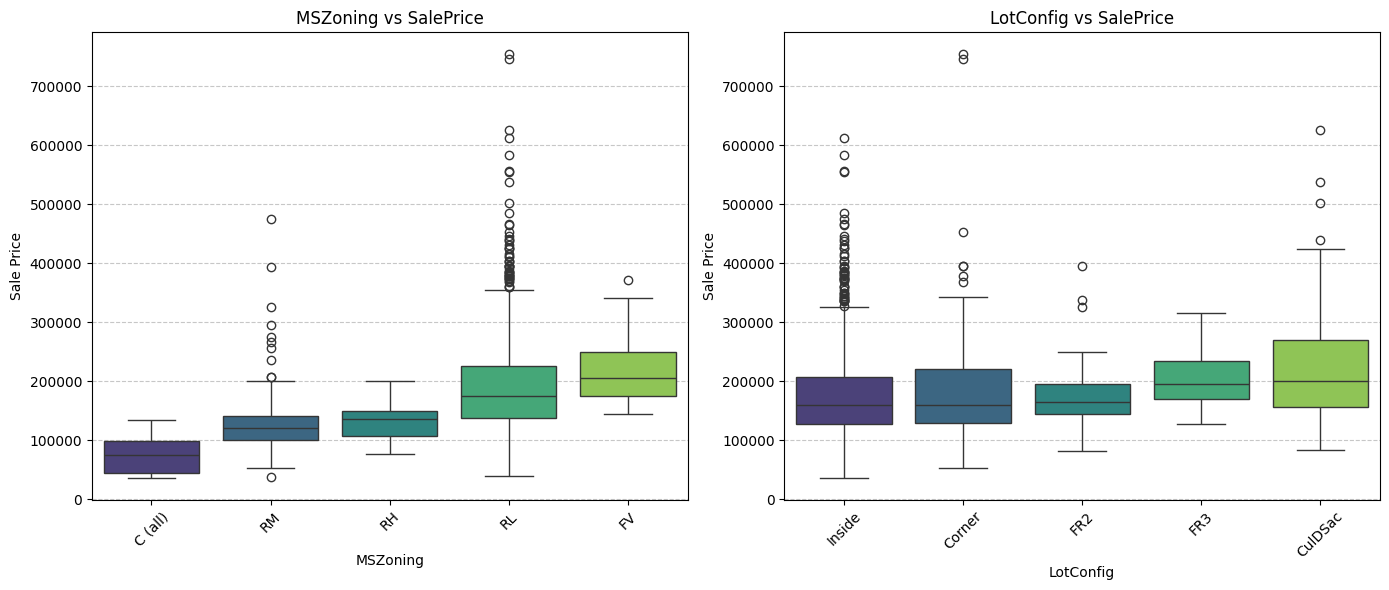

--- Statistical Summary of Location Influence ---

Feature: MSZoning
          count       mean    median       std
MSZoning                                      
FV           65  214014.06  205950.0  52369.66
RL         1151  191004.99  174000.0  80766.34
RH           16  131558.38  136500.0  35714.12
RM          218  126316.83  120500.0  48521.69
C (all)      10   74528.00   74700.0  33791.09
--------------------------------------------------

Feature: LotConfig
           count       mean    median       std
LotConfig                                      
CulDSac       94  223854.62  199262.0  93117.55
FR3            4  208475.00  195450.0  78379.22
FR2           47  177934.57  165000.0  62788.93
Corner       263  181623.43  160000.0  84466.04
Inside      1052  176938.05  159697.5  76426.81
--------------------------------------------------


In [ ]:
# Features to analyze
location_features = ['MSZoning', 'LotConfig']

# --- Visualization: Boxplots ---
plt.figure(figsize=(14, 6))

for i, feature in enumerate(location_features):
    plt.subplot(1, 2, i + 1)

    # Sort categories by Median Price to show the trend
    order = df.groupby(feature)['SalePrice'].median().sort_values().index

    sns.boxplot(x=feature, y='SalePrice', data=df, order=order, palette='viridis')
    plt.title(f'{feature} vs SalePrice')
    plt.ylabel('Sale Price')
    plt.xlabel(feature)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# --- Statistical Analysis ---
print("--- Statistical Summary of Location Influence ---")
for feature in location_features:
    print(f"\nFeature: {feature}")
    # Calculate key statistics: Count, Mean, Median, and Standard Deviation
    summary = df.groupby(feature)['SalePrice'].agg(['count', 'mean', 'median', 'std']).sort_values(by='median', ascending=False)
    print(summary.round(2))
    print("-" * 50)

/tmp/ipython-input-515071885.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='OverallCond', y='SalePrice', data=df, palette='coolwarm')


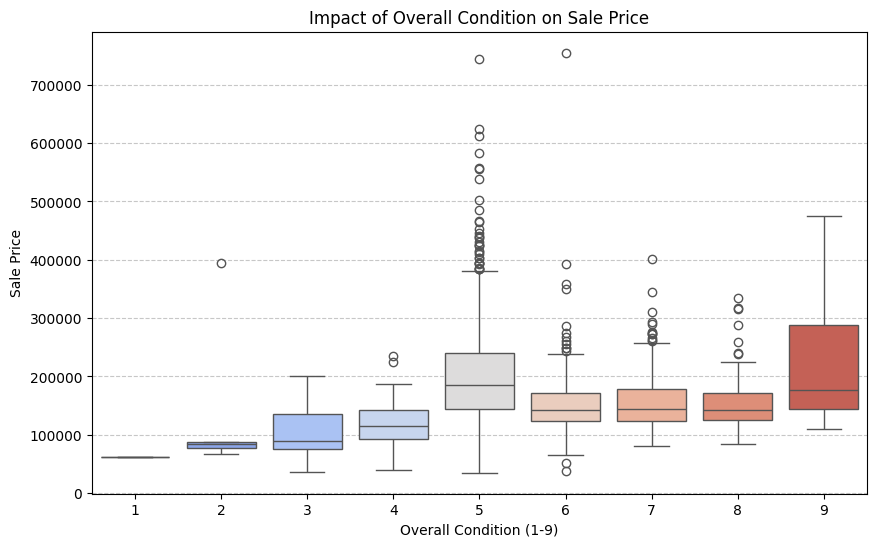

--- Average Sale Price by Overall Condition ---
             count       mean    median
OverallCond                            
1                1   61000.00   61000.0
2                5  141986.40   85000.0
3               25  101929.40   89500.0
4               57  120438.44  115000.0
5              821  203146.91  185000.0
6              252  153961.59  142750.0
7              205  158145.49  145000.0
8               72  155651.74  142500.0
9               22  216004.55  176200.0

Correlation between OverallCond and SalePrice: -0.0779


In [ ]:
# --- Visualization: Boxplot ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=df, palette='coolwarm')
plt.title('Impact of Overall Condition on Sale Price')
plt.xlabel('Overall Condition (1-9)')
plt.ylabel('Sale Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Statistical Analysis ---
print("--- Average Sale Price by Overall Condition ---")
# Calculate count, mean, and median for each condition level
summary_stats = df.groupby('OverallCond')['SalePrice'].agg(['count', 'mean', 'median']).sort_index()
print(summary_stats.round(2))

# Calculate Correlation
correlation = df['OverallCond'].corr(df['SalePrice'])
print(f"\nCorrelation between OverallCond and SalePrice: {correlation:.4f}")

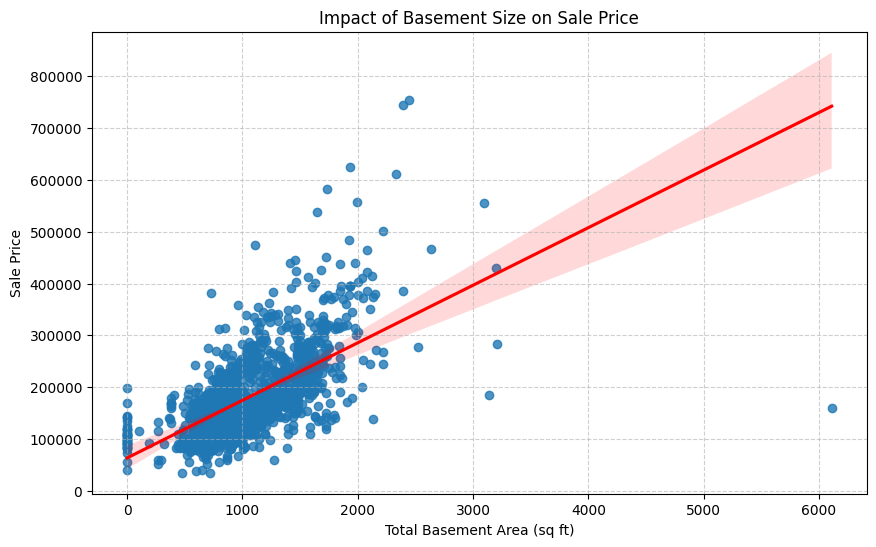

--- Statistical Findings ---
Correlation Coefficient: 0.6136
P-value: 9.4842e-152 (Significant if < 0.05)
Estimated Value per Sq Ft: $111.11


In [ ]:

import seaborn as sns
from scipy import stats

# Filter for rows where we have both Price and Basement Size (Training Data)
df_train = df.dropna(subset=['SalePrice', 'TotalBsmtSF'])

# --- Visualization: Regression Plot ---
plt.figure(figsize=(10, 6))
# regplot draws the scatter plot AND the linear regression line
sns.regplot(x='TotalBsmtSF', y='SalePrice', data=df_train, line_kws={"color": "red"})
plt.title('Impact of Basement Size on Sale Price')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Statistical Analysis ---
# 1. Pearson Correlation
correlation, p_value = stats.pearsonr(df_train['TotalBsmtSF'], df_train['SalePrice'])

# 2. Linear Regression to find the "Slope" (Price per sq ft)
slope, intercept, r_value, p_value, std_err = stats.linregress(df_train['TotalBsmtSF'], df_train['SalePrice'])

print("--- Statistical Findings ---")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-value: {p_value:.4e} (Significant if < 0.05)")
print(f"Estimated Value per Sq Ft: ${slope:.2f}")

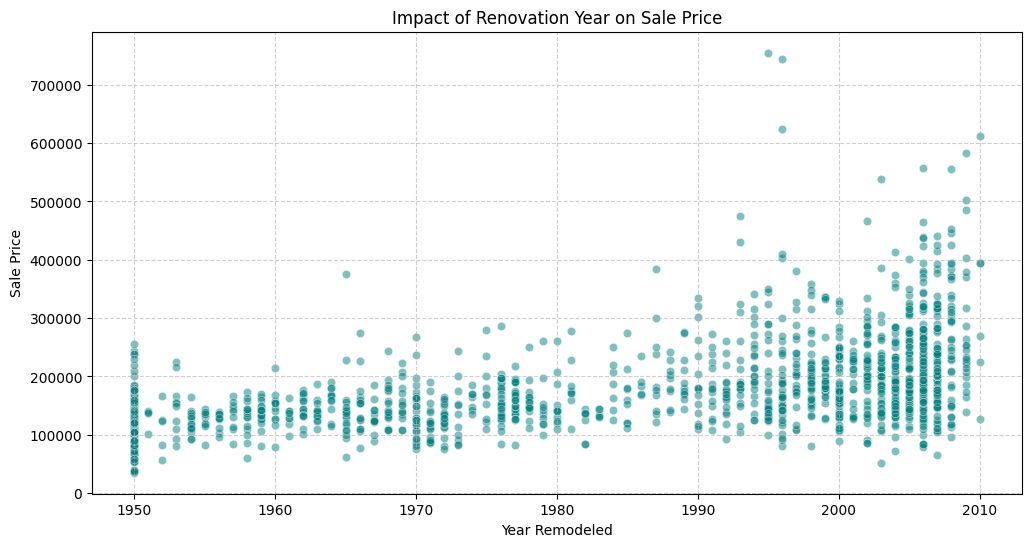

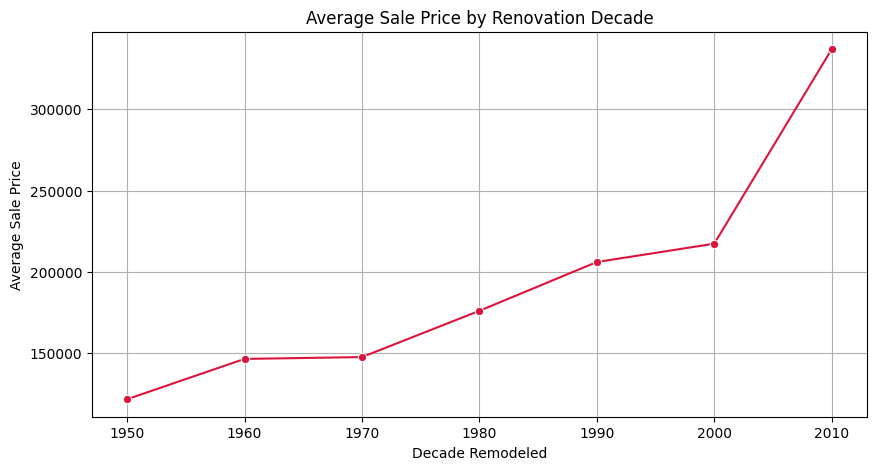

--- Statistical Findings ---
Correlation (YearRemodAdd vs SalePrice):      0.5071
Correlation (YearsSinceRemodel vs SalePrice): -0.5071


In [ ]:
# --- 1. Visualization: Scatter Plot ---
# Shows individual data points to identify the general spread and trend
plt.figure(figsize=(12, 6))
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=df, alpha=0.5, color='teal')
plt.title('Impact of Renovation Year on Sale Price')
plt.xlabel('Year Remodeled')
plt.ylabel('Sale Price')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- 2. Trend Analysis by Decade ---
# Grouping by decade smooths out the noise and shows the long-term trend clearly
df['RemodDecade'] = (df['YearRemodAdd'] // 10) * 10
decade_stats = df.groupby('RemodDecade')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='RemodDecade', y='SalePrice', data=decade_stats, marker='o', color='crimson')
plt.title('Average Sale Price by Renovation Decade')
plt.xlabel('Decade Remodeled')
plt.ylabel('Average Sale Price')
plt.grid(True)
plt.show()

# --- 3. Statistical Analysis ---
# We analyze both the Year itself and the "Age of Renovation"
df['YearsSinceRemodel'] = 2011 - df['YearRemodAdd']  # Assuming 2011 is the reference current year
corr_remod = df['YearRemodAdd'].corr(df['SalePrice'])
corr_years_since = df['YearsSinceRemodel'].corr(df['SalePrice'])

print("--- Statistical Findings ---")
print(f"Correlation (YearRemodAdd vs SalePrice):      {corr_remod:.4f}")
print(f"Correlation (YearsSinceRemodel vs SalePrice): {corr_years_since:.4f}")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. Select ONLY Categorical Features + Target
# We select 'object' types and drop rows where SalePrice is missing
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
data = df[categorical_cols + ['SalePrice']].dropna(subset=['SalePrice'])

X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# 3. Preprocessing: Impute and Encode
X = X.fillna(X.mode().iloc[0]) # Fill missing with Mode
X_encoded = pd.get_dummies(X, drop_first=True) # Convert to numbers

# 4. Train Model
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"--- Results using ONLY Categorical Features ---")
print(f"R-Squared (Accuracy): {r2:.4f}")
print(f"RMSE (Avg Error): ${rmse:,.0f}")

--- Results using ONLY Categorical Features ---
R-Squared (Accuracy): 0.3036
RMSE (Avg Error): $73,086
